# 3. ship or iceberg?

### 데이터
1. 1 = 빙산, 0 = 배
2. inc_angle에 na값이 있음

### 해야할 거
1. inc_angle에 있는 na 어떻게 처리할지
2. data랑 label로 나누기

In [14]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten


from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

## 1) 데이터 불러오고 파악하기

In [2]:
train_data = pd.read_json("./ship_iceverg" + "/train.json")
test_data = pd.read_json("./ship_iceverg"+"/test.json")

In [3]:
train_data.head()

,id,band_1,band_2,inc_angle,is_iceberg
0,dfd5f913,"[-27.878360999999998, -27.15416, -28.668615, -...","[-27.154118, -29.537888, -31.0306, -32.190483,...",43.9239,0
1,e25388fd,"[-12.242375, -14.920304999999999, -14.920363, ...","[-31.506321, -27.984554, -26.645678, -23.76760...",38.1562,0
2,58b2aaa0,"[-24.603676, -24.603714, -24.871029, -23.15277...","[-24.870956, -24.092632, -20.653963, -19.41104...",45.2859,1
3,4cfc3a18,"[-22.454607, -23.082819, -23.998013, -23.99805...","[-27.889421, -27.519794, -27.165262, -29.10350...",43.8306,0
4,271f93f4,"[-26.006956, -23.164886, -23.164886, -26.89116...","[-27.206915, -30.259186, -30.259186, -23.16495...",35.6256,0


In [4]:
test_data.head()

,id,band_1,band_2,inc_angle
0,5941774d,"[-15.863251, -15.201077, -17.887735, -19.17248...","[-21.629612, -21.142353, -23.908337, -28.34524...",34.966400
1,4023181e,"[-26.058969497680664, -26.058969497680664, -26...","[-25.754207611083984, -25.754207611083984, -25...",32.615072
2,b20200e4,"[-14.14109992980957, -15.064241409301758, -17....","[-14.74563980102539, -14.590410232543945, -14....",37.505433
3,e7f018bb,"[-12.167478, -13.706167, -16.54837, -13.572674...","[-24.32222, -26.375538, -24.096739, -23.8769, ...",34.473900
4,4371c8c3,"[-23.37459373474121, -26.02718162536621, -28.1...","[-25.72234344482422, -27.011577606201172, -23....",43.918874


In [5]:
print(train_data.shape)
print(test_data.shape)

(1604, 5)
(8424, 4)


In [6]:
train_data.isnull().sum()

id            0
band_1        0
band_2        0
inc_angle     0
is_iceberg    0
dtype: int64

In [7]:
sum(train_data['inc_angle'] == "na")

133

In [8]:
test_data.isnull().sum()

id           0
band_1       0
band_2       0
inc_angle    0
dtype: int64

In [26]:
# train_set을 x랑 y로 나누기

y_train = np.array(train_data['is_iceberg'])

x_train = train_data.drop(['id','is_iceberg'], axis=1)

In [10]:
x_train.head()

,band_1,band_2,inc_angle
0,"[-27.878360999999998, -27.15416, -28.668615, -...","[-27.154118, -29.537888, -31.0306, -32.190483,...",43.9239
1,"[-12.242375, -14.920304999999999, -14.920363, ...","[-31.506321, -27.984554, -26.645678, -23.76760...",38.1562
2,"[-24.603676, -24.603714, -24.871029, -23.15277...","[-24.870956, -24.092632, -20.653963, -19.41104...",45.2859
3,"[-22.454607, -23.082819, -23.998013, -23.99805...","[-27.889421, -27.519794, -27.165262, -29.10350...",43.8306
4,"[-26.006956, -23.164886, -23.164886, -26.89116...","[-27.206915, -30.259186, -30.259186, -23.16495...",35.6256


In [11]:
y_train.head()

0    0
1    0
2    1
3    0
4    0
Name: is_iceberg, dtype: int64

In [27]:
# inc_angle에 있는 na값을 0으로 치환

x_train.inc_angle = x_train.inc_angle.replace('na', 0)
x_train.inc_angle = x_train.inc_angle.astype(float).fillna(0.0)

sum(x_train['inc_angle']=='na')

0

## 2) 모델 만들기

In [28]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=777)

In [31]:
from tensorflow.keras.optimizers import SGD

model = Sequential()

model.add(Dense(32, input_shape=(5625,5625, 3), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=SGD(lr=0.01),
              loss='binary_crossentropy',
              metrics=['binary_accuracy'])

In [32]:
history = model.fit(x_train, y_train, epochs=30, batch_size=128, validation_data=(x_val, y_val))

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type list).

# 4. Titanic

## 1) 데이터 전처리

In [38]:
df_train = pd.read_csv("C:/Users/user/kaggle/train.csv")
df_test = pd.read_csv("C:/Users/user/kaggle/test.csv")

In [40]:
df_train['FamilySize'] = df_train['SibSp'] + df_train["Parch"] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

In [4]:
df_train['FamilySize'] = df_train['SibSp'] + df_train["Parch"] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

### 1-1) null값 처리
- age, cabin, embarked 에 null값 있음

In [42]:
for col in df_train.columns:
    msg = 'column: {:>15}\t Percent of NaN value: {:.2f}%'.format(col, 100*df_train[col].isnull().sum()/len(df_train[col]))
    print(msg)

column:     PassengerId	 Percent of NaN value: 0.00%
column:        Survived	 Percent of NaN value: 0.00%
column:          Pclass	 Percent of NaN value: 0.00%
column:            Name	 Percent of NaN value: 0.00%
column:             Sex	 Percent of NaN value: 0.00%
column:             Age	 Percent of NaN value: 19.87%
column:           SibSp	 Percent of NaN value: 0.00%
column:           Parch	 Percent of NaN value: 0.00%
column:          Ticket	 Percent of NaN value: 0.00%
column:            Fare	 Percent of NaN value: 0.00%
column:           Cabin	 Percent of NaN value: 77.10%
column:        Embarked	 Percent of NaN value: 0.22%
column:      FamilySize	 Percent of NaN value: 0.00%


In [43]:
df_train['Initial'] = df_train.Name.str.extract("([A-Za-z]+)\.")
df_test['Initial'] = df_test.Name.str.extract("([A-Za-z]+)\.")

In [44]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

In [45]:
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=="Mr"),'Age']=33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=="Mrs"), 'Age']=36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=="Master"),'Age']=5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age']=22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'),"Age"]=46

df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mr'),'Age'] = 33
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mrs'),'Age'] = 36
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Master'),'Age'] = 5
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Miss'),'Age'] = 22
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Other'),'Age'] = 46

In [46]:
df_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [47]:
df_train['Embarked'].fillna("S", inplace=True)

In [48]:
def category_age(x):
    if x<10:
        return 0
    if x<20:
        return 1
    if x<30:
        return 2
    if x<40:
        return 3
    if x<50:
        return 4
    if x<60:
        return 5
    if x<70:
        return 6
    else:
        return 7
    
df_test['Age_cat'] = df_test['Age'].apply(category_age)

In [49]:
df_train.drop(['Age'], axis=1, inplace=True)
df_test.drop(['Age'], axis=1, inplace=True)

### 1-2) 범주형으로 바꾸기

In [50]:
df_train['Initial'] = df_train['Initial'].map({'Master':0, "Miss":1, "Mr":2, "Mrs":3, "Other":4})
df_test['Initial'] = df_test['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})

In [51]:
df_train.Embarked = df_train.Embarked.map({"C":0, "Q":1, "S":2})
df_test.Embarked = df_test.Embarked.map({"C":0, "Q":1, "S":2})

In [52]:
df_train.Sex = df_train.Sex.map({"female":0, "male":1})
df_test.Sex = df_test.Sex.map({'female':0, 'male':1})

### 1-3) one-hot encoding

In [53]:
df_train = pd.get_dummies(df_train, columns=['Initial'], prefix = "Initial")
df_test = pd.get_dummies(df_test, columns=["Initial"], prefix = 'Initial')

In [54]:
df_train = pd.get_dummies(df_train, columns=["Embarked"], prefix=['Embarked'])
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix=['Embarked'] )

In [55]:
df_train.drop(['PassengerId', "Name", "SibSp", "Parch", "Ticket", "Cabin"], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name',  'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [56]:
x_train = df_train.drop("Survived", axis=1).values
target_label = df_train['Survived'].values
x_test = df_test.values

In [57]:
x_train, x_vld, y_train, y_vld = train_test_split(x_train, target_label, test_size=0.3, random_state=5)

In [67]:
x_train.shape

(623, 12)

## 2) 모델 만들기

In [76]:
from tensorflow.keras.optimizers import SGD

model = Sequential()

model.add(Dense(64, input_shape=(12,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=SGD(lr=0.05),
              loss='binary_crossentropy',
              metrics=['binary_accuracy'])

In [79]:
history = model.fit(x_train, y_train, epochs=25,batch_size=32, validation_data=(x_vld, y_vld))

Epoch 1/25
20/20 [==============================] - 0s 5ms/step - loss: 0.5523 - binary_accuracy: 0.6902 - val_loss: 0.5293 - val_binary_accuracy: 0.7388
Epoch 2/25
20/20 [==============================] - 0s 4ms/step - loss: 0.6304 - binary_accuracy: 0.6918 - val_loss: 0.5799 - val_binary_accuracy: 0.7463
Epoch 3/25
20/20 [==============================] - 0s 5ms/step - loss: 0.6197 - binary_accuracy: 0.6356 - val_loss: 0.7719 - val_binary_accuracy: 0.6716
Epoch 4/25
20/20 [==============================] - 0s 5ms/step - loss: 0.6377 - binary_accuracy: 0.6597 - val_loss: 0.5414 - val_binary_accuracy: 0.7090
Epoch 5/25
20/20 [==============================] - 0s 4ms/step - loss: 0.5749 - binary_accuracy: 0.6677 - val_loss: 0.5349 - val_binary_accuracy: 0.6455
Epoch 6/25
20/20 [==============================] - 0s 4ms/step - loss: 0.5619 - binary_accuracy: 0.6709 - val_loss: 0.5116 - val_binary_accuracy: 0.7015
Epoch 7/25
20/20 [==============================] - 0s 5ms/step - loss: 0.54

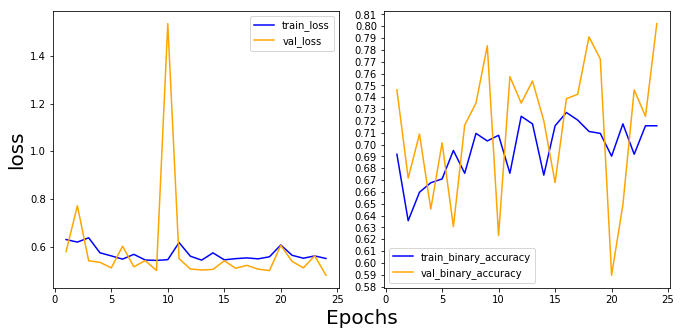

In [80]:
def draw_loss_acc(his, epochs):
    his_dict = his.history
    keys = list(his_dict.keys())
    
    epochs = range(1, epochs)
    fig = plt.figure(figsize = (10,5))
    ax = fig.add_subplot(1,1,1)
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
    
    
    for i in range(2):
        temp_ax = fig.add_subplot(1,2,i+1)
        temp = keys[i]
        val_temp = keys[i+2]
        temp_ax.plot(epochs, his_dict[temp][1:], color= 'blue', label='train_'+temp)
        temp_ax.plot(epochs, his_dict[val_temp][1:], color='orange', label=val_temp)
        
        if i==1:
            start, end = temp_ax.get_ylim()
            temp_ax.yaxis.set_ticks(np.arange(np.round(start,2), end, 0.01))
        temp_ax.legend()
        
    ax.set_ylabel('loss', size=20)
    ax.set_xlabel('Epochs', size=20)
    plt.tight_layout()
    plt.show()
    
draw_loss_acc(history, 25)